# General thought process
ANNs are not the best choice when:
- the model has to be highly interpretable (complexity usually deducts interpretability)
- the dataset is too small
- the computional ressources are not sufficient (especially when a less demanding model like Linear Regression would be sufficient as well)

Nevertheless I decided to choose ANNs for this assignment, due to my interest in the topic.
Therefore the choice of the model is (in this case) not made based on rationality. Further changes to the model, on the other hand, are made on the basis of observations and investigations and explained at the appropriate sections.

The dataset "creditcard" was chosen, at it offers the compexity and size to actually benefit from an ANN (it is our dataset with most observations & features). Furthermore, most input features were PCA transformed, which by itself already limits interpretability (here it is important to mention, that PCA transformations are generally not needed for ANNs as Multicollinearity is not an issue - nevertheless PCA can increase the learning speed due to feature & noise reduction which would otherwise be done by back propagation). Furthermore no additional features will be calculated with the help of the PCA transformed features.

Explanatory analysis faces the same problem: Regarding the PCA transformations, the only explanatory plots that can be used are on the time, amount and class columns.

I will use keras binary classification for the fraud problem, as there are only two ways to classify a transaction: fraudulent (1) and not fraudulent (0).

# Code

In [536]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [537]:
#Link is currently in the same folder
df = pd.read_csv('creditcard.csv')

# Explanatory Analysis

In [538]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [540]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


To be sure, the following code will check on Null values in the whole dataset.

In [541]:
# check on null values
has_null_values = df.isnull().sum().sum()
has_null_values

0

The following plot is supposed to show the total transaction amount per hour for each class. This may indicate a cycality or other pattern over time. While the there is a quite consitent and apprently cyclical pattern (it is just over 2 days, so this can be random) for the non fraudulent transactions, the fraudulent transactions appear more random over time. This makes it harder to detect all of them.

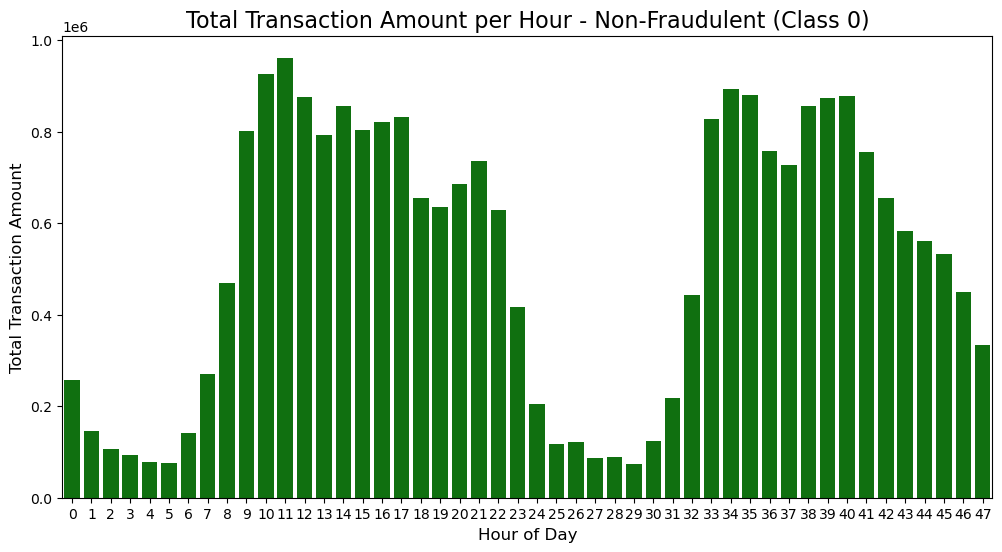

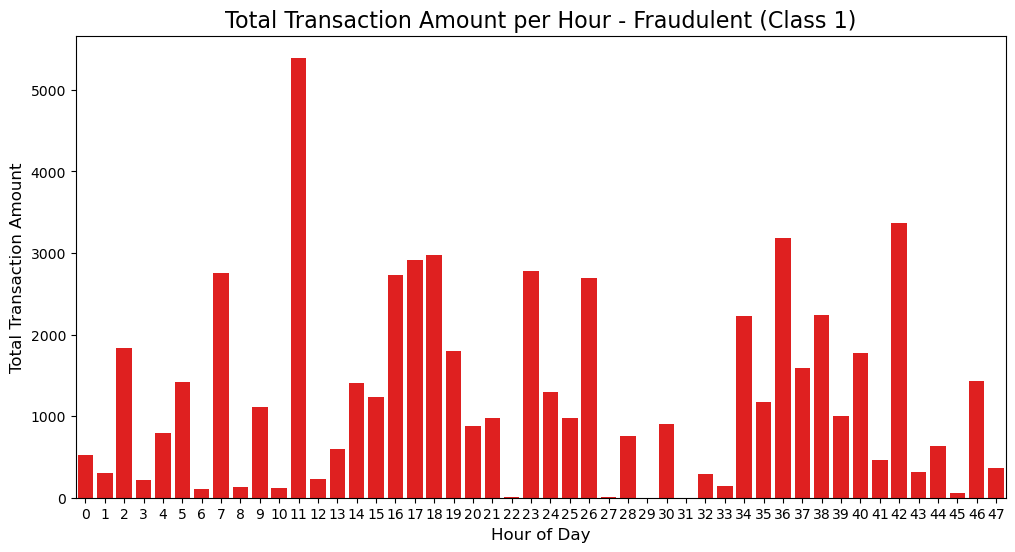

In [542]:
# Convert seconds to hours
df['Hour'] = (df['Time'] // 3600).astype(int)

# Aggregate transaction amounts by hour and class
hourly_data_by_class = df.groupby(['Hour', 'Class'])['Amount'].sum().unstack(fill_value=0).reset_index()

# Rename columns for clarity
hourly_data_by_class.columns = ['Hour', 'Non-Fraud (Class 0)', 'Fraud (Class 1)']

# Plot for Non-Fraudulent Transactions (Class 0)
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_data_by_class, x='Hour', y='Non-Fraud (Class 0)', color='green')
plt.title("Total Transaction Amount per Hour - Non-Fraudulent (Class 0)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.xticks(rotation=0)  # Ensure horizontal labels
plt.show()

# Plot for Fraudulent Transactions (Class 1)
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_data_by_class, x='Hour', y='Fraud (Class 1)', color='red')
plt.title("Total Transaction Amount per Hour - Fraudulent (Class 1)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.xticks(rotation=0)  # Ensure horizontal labels
plt.show()

The following graphs show the transaction count over time (in hours). Here agaian, we are looking for patterns. As before, there seems to be a pattern for the non fraudulent transactions but not so much for the fraudulent ones.

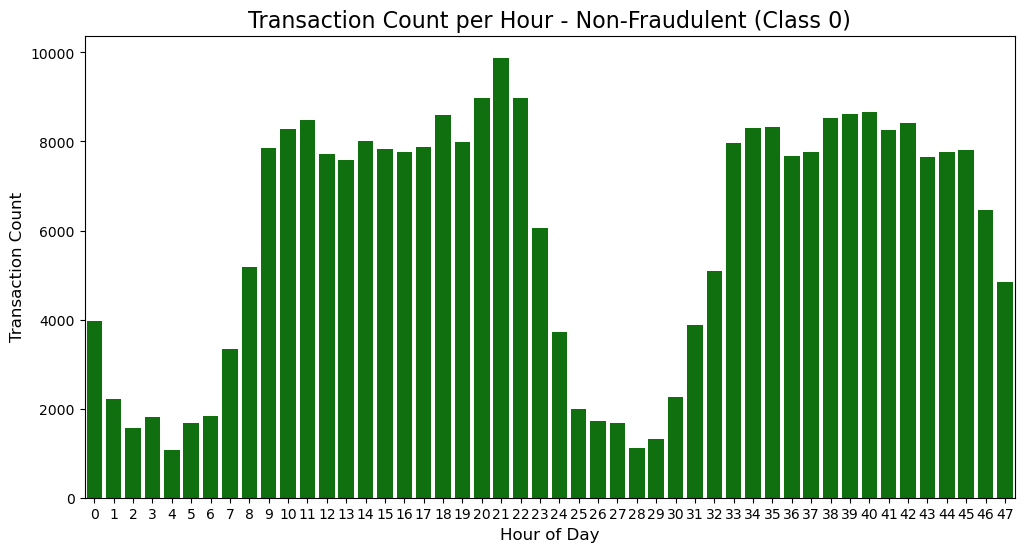

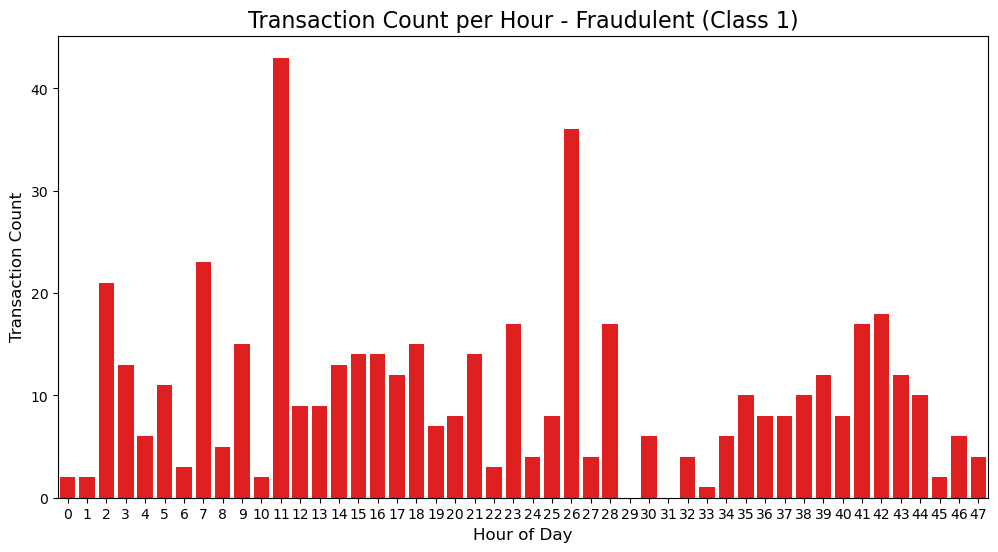

In [543]:
# Aggregate transaction counts by hour and class
hourly_transaction_counts = df.groupby(['Hour', 'Class']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
hourly_transaction_counts.columns = ['Hour', 'Non-Fraud (Class 0)', 'Fraud (Class 1)']

# Plot for Non-Fraudulent Transactions (Class 0)
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_transaction_counts, x='Hour', y='Non-Fraud (Class 0)', color='green')
plt.title("Transaction Count per Hour - Non-Fraudulent (Class 0)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.xticks(rotation=0)  # Ensure horizontal labels
plt.show()

# Plot for Fraudulent Transactions (Class 1)
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_transaction_counts, x='Hour', y='Fraud (Class 1)', color='red')
plt.title("Transaction Count per Hour - Fraudulent (Class 1)", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Transaction Count", fontsize=12)
plt.xticks(rotation=0)  # Ensure horizontal labels
plt.show()

The following shows if the ratio of fraudulent transactions is higher at a certain time. Her it is easier to see a pattern. Nevertheless this ratio can not be used for modeling (only with a lag - but for this we need a longer time series).

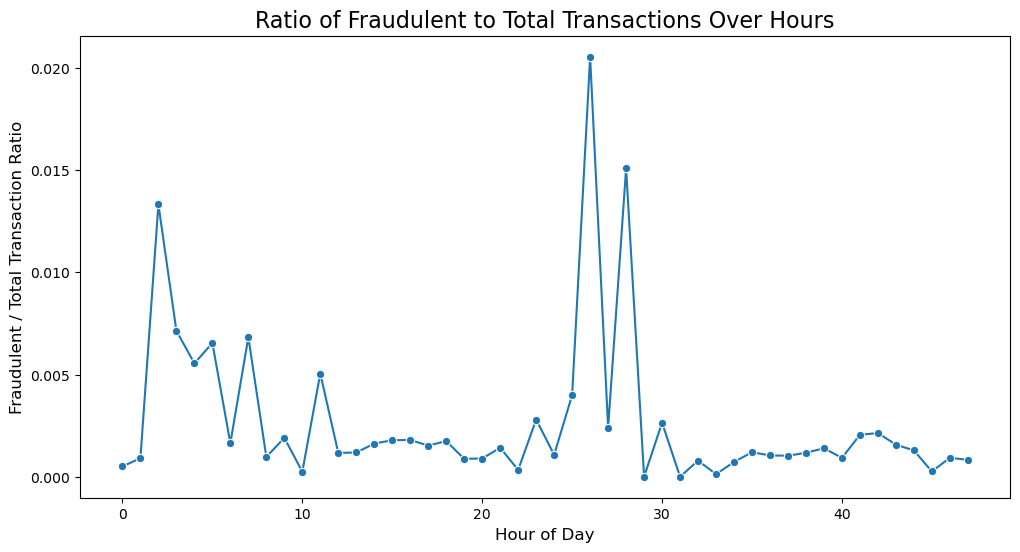

In [544]:
# Count total transactions and fraudulent transactions per hour
hourly_totals = df.groupby('Hour').size()
hourly_frauds = df[df['Class'] == 1].groupby('Hour').size()

# Calculate the ratio of fraudulent to total transactions
fraud_ratio = (hourly_frauds / hourly_totals).fillna(0).reset_index(name='Fraud Ratio')

# Plot the ratio
plt.figure(figsize=(12, 6))
sns.lineplot(data=fraud_ratio, x='Hour', y='Fraud Ratio', marker='o')

# Add title and labels
plt.title("Ratio of Fraudulent to Total Transactions Over Hours", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Fraudulent / Total Transaction Ratio", fontsize=12)

# Show the plot
plt.show()

The following graph is supposed to show if the average transaction size is bigger for a certain class. Apperently it is for fraudulent transactions.

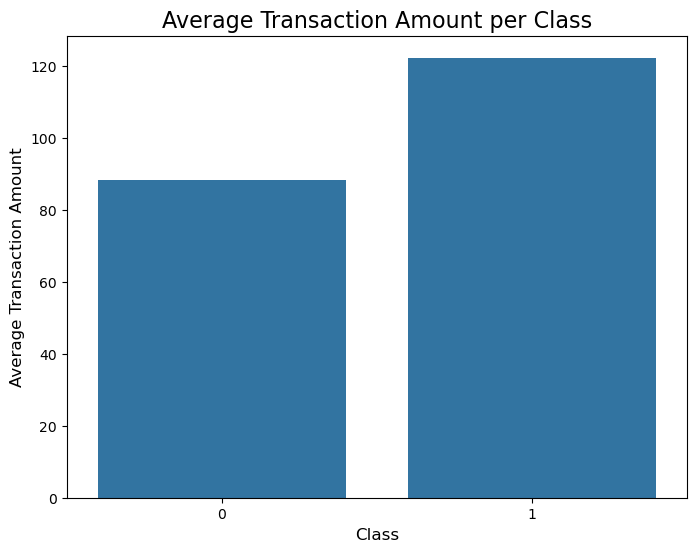

In [545]:
# average transaction amount per class
average_amount_per_class = df.groupby('Class')['Amount'].mean().reset_index()

# plot the average transaction amount per class
plt.figure(figsize=(8, 6))
sns.barplot(data=average_amount_per_class, x='Class', y='Amount')

# Add title and labels
plt.title("Average Transaction Amount per Class", fontsize=16)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Average Transaction Amount", fontsize=12)

# Show the plot
plt.show()

# Model

Here we convert the time into sin and cos time as this provides information about the cycality of certain patterns. This dataset includes information about 2 days or 48 hours. To see cycality in days or hours, I computed values for both in the following and tested them to see which pair of features performs better (the daily did).

Nevertheless, both models performed worse than the one just keeping the time feature, which is why I kept this (maybe indicating a trend, no cycality).

The code can be seen below.

In [546]:
# Convert seconds to "time of day" by taking modulus of 24 hours
# df['time_of_day'] = df['Time'] % (24 * 3600)

# Normalize time_of_day to a range [0, 1]
# df['time_of_day_normalized'] = df['time_of_day'] / (24 * 3600)

# Create sine and cosine transformations
# df['time_sin'] = np.sin(2 * np.pi * df['time_of_day_normalized'])
# df['time_cos'] = np.cos(2 * np.pi * df['time_of_day_normalized'])

In [547]:
# Time within the hour (0 to 3599)
# df['time_within_hour'] = df['Time'] % 3600

# Normalize to [0, 1]
# df['time_within_hour_normalized'] = df['time_within_hour'] / 3600

# Sine and Cosine transformations for hourly cyclic patterns
# df['hour_sin'] = np.sin(2 * np.pi * df['time_within_hour_normalized'])
# df['hour_cos'] = np.cos(2 * np.pi * df['time_within_hour_normalized'])

The hour column will be droped, as it is redundant information, considering that we already have a time column.

In [548]:
X = df.drop(columns=['Class', 'Hour'])
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [549]:
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

# Train/ Test Split

This is used to test the model on unseen data. The split in this case is 80% train and 20% test (dependent of the source a split between 20/80 and 30/70 is seen as best practice).

In [550]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization

It is important to normalize the data before running the ANN. One techinque for this is the StandardScaler. As it uses gradient descent to minimize its loss function, different scales in the features tend to skew the model (e.g. higher weight on large-scale features). Furthermore it improves performance as weights are found more easily.

As y is categorical it does not make sense to use it here (although usually in general not used, as there is only one output and therefore no scaling difference).

In [551]:
# Standardize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Class Weights
This is important, as there are much more non-fraudulent transactions as fraudulent ones (imbalanced dataset). 

Therefore there are 2 main ideas, introducing class weights here:
- The fraudulent class get's increased by weight (the total number of transactions divided by the sum of fraudulent transactions). This is problematic, as a lot of synthetic data is created with this technique for fraudulent transactions.

- The non-fraudulent class gets decreased by lowering the weights (the sum of fraudulent transactions gets devided by the total number of transactions). This is problematic, as the dataset shrinks significantly, leading to less training and test data for the ANN.

After testing both ways, the best result was not introducing weights here. Nevertheless you can see the code below.

In [552]:
# increase 1
# class_weights = {0: 1, 1: len(y) / sum(y)}

In [553]:
# decrease 0
# class_weights = {0: sum(y)/len(y), 1: 1}

In [554]:
# normal weights
class_weights = {0: 1, 1: 1}

# ANN

Here I start running the model. Due to limited processing ressources, I started my first layer with 64 neurons. Afterward I halfed them up to 16, as this is common practice in most cases. Nevertheless this has to be tested out ususally. As my time & ressources are limited, I could not run a unlimited number of iterations which is why this model has to be sufficient for the moment. In the following I will introduce the following concept, I used in the code below:

Dense layer:
- Here I defined the shape of the input based on X_train, as it specifies the number of features introduced to the model. Nevertheless the first layer is a combination of an input and an hidden layer as it combines this with the first activation function (relu). One could say, the input layer is implied here by the input_shape argument but not explicitly represented as a distinct layer.

For the hidden layers in the model, I used the following activation functions:
- relu (Rectified Linear Unit): This is used to introduce non-linearity and is one of the most common and efficient choices for ANNs to do so. Due to resource limitations, I was not able to play around with alternatives such as leaky & parametric relu, ELU, SELU or GELU. Therefore this choice was made.
- sigmoid: This is used to map values between 0 and 1. As we are facing a classification problem, this is perfect for our output layer, as the output values, which are between 0 and 1 are probabilities for 1. The decision on only using one neuron is due to the fact, that we are running a binary classification model and not a multiclass classification (although sigmoid would not be the right choice for this either, as the probabilites would not be mutually exclusive).

Normalization layer:
Here we use BatchNormalization. As discussed before, normalized features work better for ANNs. That is why we normalize between layers as well.

Regularization layer:
Here we use Dropout. This drops out/ ignores random neurons during training. This helps generalizing the model and avoid overfitting. Here the drop out rate is 20%, this number was tested on 30% as well, delivering worse results. To optimize this perfectly, more iterations would be needed.

In general, there is a lot of functions that were not tried and hyperparametertuning that is not optimized. That is due to missing ressources and time. In case this was given, I would proceed with trying alternative activation functions for the hidden layers as well as optimizing the number of neurons and the drop out rates.

In [555]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),              # not too many neurons as this may lead to overfitting, ReLu is an activation function for non-linearity, the shape gives the model the number of features for the input (in our case all features of X)
    BatchNormalization(),                                                       # Normalization of the Output of the layer from before
    Dropout(0.2),                                                               # Drops out random neurons (in this case 20%, more would be too much regarding the "small" size of the dataset) to avoid overfitting (as it stops the model to memorize the whole dataset) -> this is particulary more interesting when neurons number decreases
    Dense(32, activation='relu'),                                               # lower number of neurons due to lower computational (often recommended as best practice) hyperparemeter tning
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')                                              # production of the output, as it is a binary classification problem, the number of neurons is 1
])

In the following code, I set up the optimizer for the loss function as well as how to evaluate the model.
- As optimizer I used Adam, which is capable of adapting learning rates based on the magnitude of gradiends (we will be able to see that in the loss function later). In general Adam is a widely used optimizer, which is why I chose it as well.
- As learning rate I used 0.001. I tried it with different rates as well, but this one was delivering the best results so far as it allowed a relatively stable convergence at the end but still was high enough to allow the bigger steps in the beginning (see the loss function later). This can still be optimized by trying out different learning rates. In general lower learning rates require more epochs (and processing power) but allow a smoother convergence and therefore more exact model.
- The loss function was chosen due to the binary classification problem.
- The metric to optimize was chosen as recall, it is the more important metric for credit card fraud and delivered the best results (I tried it on accuracy as well). It is possible to optimize on more than one metric as well.

In [556]:
# with accuracy
# from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [557]:
# with Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[Recall()])

To increase efficiency (and avoid overfitting) I introduced early stopping, which stops the model when the valuation metric (in this case recall) does not improve anymore. As restore_best_weights = True, the best model is chosen, even if the model is getting worse afterwards.

Here again, this can be optimized by changing patience (20 is relatively high but I wanted to avoid the model to stop too fast while there is still room for improvement) as well as monitor. I used recall to monitor as this is the metric to optimize.

In [558]:
# Define early stopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='recall_score', patience=20, restore_best_weights=True)

In the following line, I ran the model. As validation split I used 0.2 (20% validation set), as this is common use. The class_weights were kept the same as mentioned before. They just got introduced here to make changes easier. The early stopping is added as well.
Initially my batch_size was lower, but I increased it to stabilize the model, as the backpropagation is based on a bigger sample size. Furthermore it makes the training faster. Nevertheless the batch size is dependent of the size of the memory. If the hardware does not match, it is not possible to increase the batch size further.

In [559]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/100
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0413 - recall_12: 0.6077 - val_loss: 0.0042 - val_recall_12: 0.7711
Epoch 2/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.0041 - recall_12: 0.7138 - val_loss: 0.0040 - val_recall_12: 0.7831
Epoch 3/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.0037 - recall_12: 0.7363 - val_loss: 0.0034 - val_recall_12: 0.8072
Epoch 4/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.0034 - recall_12: 0.7621 - val_loss: 0.0031 - val_recall_12: 0.8072
Epoch 5/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.0032 - recall_12: 0.7492 - val_loss: 0.0032 - val_recall_12: 0.8072
Epoch 6/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0031 - recall_12: 0.7878 - val_loss: 0.0030 - val_recall_12: 0.8193
Epoch 7/100
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0027 - recall_12: 0.7781 - val_loss: 0.

The following code makes the predictions based on the trained model on the test set.

In [560]:
y_pred = model.predict(X_test)
y_pred

1781/1781 [==============================] - 1s 714us/step


array([[1.3232651e-06],
       [5.5194560e-10],
       [1.0001477e-06],
       ...,
       [1.3496469e-11],
       [1.7480918e-08],
       [3.3309586e-08]], dtype=float32)

In this graph we can check if it makes sense to decrease the treshhold to improve recall.

c:\Users\rathm\miniconda3\envs\MLII\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


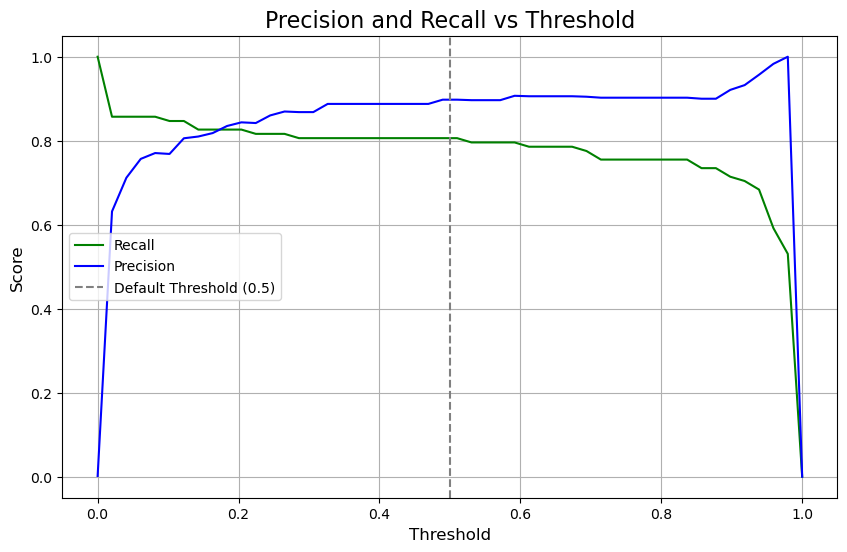

In [561]:
from sklearn.metrics import precision_score, recall_score

# Define thresholds
thresholds = np.linspace(0, 1, 50)

# Initialize lists to store precision and recall
precisions = []
recalls = []

# Calculate precision and recall for each threshold
for t in thresholds:
    y_pred_labels = (y_pred > t).astype(int)
    precisions.append(precision_score(y_test, y_pred_labels))
    recalls.append(recall_score(y_test, y_pred_labels))

# Plot precision and recall as functions of threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.plot(thresholds, precisions, label='Precision', color='blue')

# Add labels, title, and legend
plt.title('Precision and Recall vs Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold (0.5)')
plt.legend()
plt.grid()
plt.show()

The following code classifies the predictions by saying >0.5 is class 1 (fraudulent) and <0.5 is class 0 (non fraudulent).
Here recall can be increased by changing the value to a lower one, as in that case more predictions may be seen as potentially fraudulent. But this increases the number of positives, not only True Positives but also False Positives. However, as recall does not increase significantly, we keep the value at 0.5.

In [562]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Model Evaluation

Here we can see the models trainig process.

In [563]:
epochs_hist.history.keys()

dict_keys(['loss', 'recall_12', 'val_loss', 'val_recall_12'])

The following code plots the loss function. The big step in the beginning and the smooth decrease towards the end indicate, that the batch size and learning rate are relatively well chosen. At the end, the slope flattens, which indicates that there is not that much more space to improve by adding additional epochs.

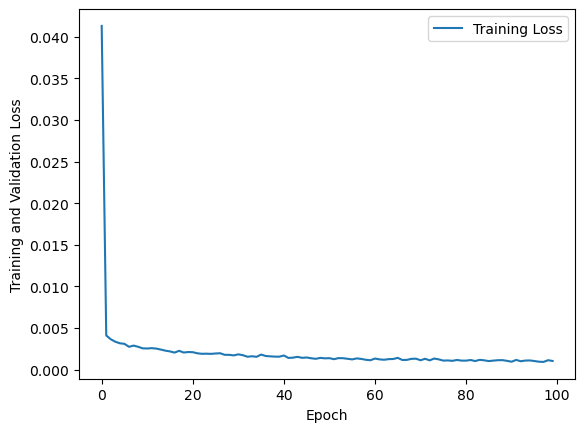

In [564]:
plt.plot(epochs_hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

Next we plot the confusion matrix for the train set.

7121/7121 [==============================] - 6s 840us/step


<Axes: >

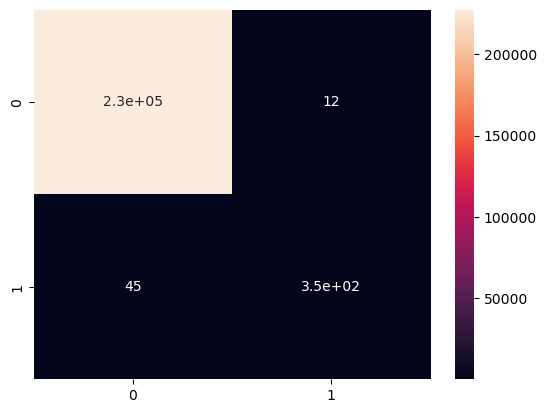

In [565]:
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int).ravel()
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True)

This will give us the classification report. Here it is too mention that this is biased to the higher number of non fraudulent transactions. This may lead to a significant difference compared to the test set.

Howsoever, this will be interpreted and set in context after watching the classification report on the test set.


In [566]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227484
           1       0.89      0.97      0.92       361

    accuracy                           1.00    227845
   macro avg       0.94      0.98      0.96    227845
weighted avg       1.00      1.00      1.00    227845



Next we plot the confusion matrix for the train set.

<Axes: >

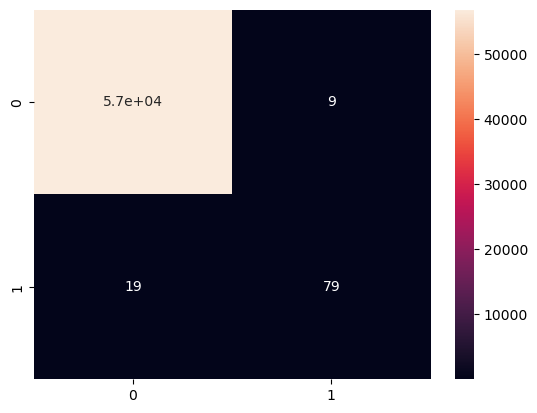

In [567]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In the classification report below we can see the following:
- Precision:
    - As for the test set, close to all transactions predicted as non-fraud are indeed non-fraudulent.
    - Of all transactions predicted as fraud, 90% were actually fraudulent. The remaining 12% were false positives. This is slightly more than in the train set.
- Recall:
    - The model successfully identified close to all actual non-fraudulent transactions.
    - The model identified 81% of fraudulent transactions but missed 19%. This is the biggest divergence from the train set. This is probably due to the bias to the non fraudulent transactions.
- F1-Score: This is slightly lower than in the train set for the fraudulent transactions. As explained before, this is probably due to the bias in the data.
- Support: The small number of fraudulent transactions in the dataset makes it hard to maintain the performance from the train set, underlining the thesis from before.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

